# House Loan Data Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

- [ ] Load the dataset that is given to you

In [42]:
df = pd.read_csv(r'C:\Users\jlod9\OneDrive\Documents\4_Canada plan\Files to add to Git hub\3_Deep Learning With Keras and Tensorflow\loan_data.csv')

In [43]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.shape

(307511, 122)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- [x] <span style="color:green">Load the dataset that is given to you

# Preprocessing
- [ ] Check for null values in the dataset
- [ ] Print percentage of default to payer of the dataset for the TARGET column
- [ ] Encode the columns that is required for the model
- [ ] Balance the dataset if the data is imbalanced
- [ ] Plot the balanced data or imbalanced data

## Check for null values in the dataset

In [46]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Too many columns to preview so we will filter out what we are not looking for

In [47]:
df.isnull().sum()/len(df)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

### Too many to view so will we specify what we want 

In [48]:
for col in df.columns:
    if df[col].isna().sum()/len(df) > 0.3:
        print(col, df[col].isna().sum()/len(df))

OWN_CAR_AGE 0.6599081008484249
OCCUPATION_TYPE 0.31345545362604915
EXT_SOURCE_1 0.5638107254699832
APARTMENTS_AVG 0.5074972927797705
BASEMENTAREA_AVG 0.5851595552679416
YEARS_BEGINEXPLUATATION_AVG 0.48781019215572774
YEARS_BUILD_AVG 0.6649778381911542
COMMONAREA_AVG 0.6987229725115525
ELEVATORS_AVG 0.532959796560123
ENTRANCES_AVG 0.503487680115508
FLOORSMAX_AVG 0.4976082156410665
FLOORSMIN_AVG 0.6784862980511266
LANDAREA_AVG 0.5937673774271489
LIVINGAPARTMENTS_AVG 0.6835495315614726
LIVINGAREA_AVG 0.5019332641759157
NONLIVINGAPARTMENTS_AVG 0.6943296337366793
NONLIVINGAREA_AVG 0.5517916432257708
APARTMENTS_MODE 0.5074972927797705
BASEMENTAREA_MODE 0.5851595552679416
YEARS_BEGINEXPLUATATION_MODE 0.48781019215572774
YEARS_BUILD_MODE 0.6649778381911542
COMMONAREA_MODE 0.6987229725115525
ELEVATORS_MODE 0.532959796560123
ENTRANCES_MODE 0.503487680115508
FLOORSMAX_MODE 0.4976082156410665
FLOORSMIN_MODE 0.6784862980511266
LANDAREA_MODE 0.5937673774271489
LIVINGAPARTMENTS_MODE 0.683549531561472

### Let's remove all columns that contain more than 30% missing values

In [49]:
for col in df.columns:
    if df[col].isna().sum()/len(df) > 0.3:
        df = df.drop(columns=[col], axis=0)

In [50]:
df.shape

(307511, 72)

### Let's impute values for columns that contain less than 5% missing values

In [51]:
for col in df.columns:
    if df[col].isna().sum()/len(df) > 0.05:
        print(col, df[col].isna().sum()/len(df))

EXT_SOURCE_3 0.19825307062186392
AMT_REQ_CREDIT_BUREAU_HOUR 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_DAY 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_WEEK 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_MON 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_QRT 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_YEAR 0.13501630835970097


In [52]:
for col in df.columns:
    if df[col].isna().sum()/len(df) > 0.05:
        print(col, df[col].isna().sum()/len(df))

EXT_SOURCE_3 0.19825307062186392
AMT_REQ_CREDIT_BUREAU_HOUR 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_DAY 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_WEEK 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_MON 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_QRT 0.13501630835970097
AMT_REQ_CREDIT_BUREAU_YEAR 0.13501630835970097


In [53]:
df.shape

(307511, 72)

### Let's drop rows values for columns that contain less than 5% missing values

In [54]:
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 72, dtype: bool

In [55]:
df = df.dropna()

In [56]:
df.shape

(244280, 72)

- [x] Check for null values in the dataset

## Encode the columns that is required for the model

In [57]:
df.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [58]:
df[df.select_dtypes(include=['object']).columns].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [59]:
cat = df.select_dtypes(include=['object']).columns

In [60]:
cols = pd.get_dummies(df[cat])
cols.shape

(244280, 104)

In [61]:
df = df.drop(columns=cat)
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307505,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df = pd.concat([df.reset_index(drop=True),cols.reset_index(drop=True)], axis=1)
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
2,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
3,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
4,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.shape

(244280, 165)

- [x] Encode the columns that is required for the model

## Print percentage of default to payer of the dataset for the TARGET column

In [64]:
print(str(round(len(df[df.TARGET ==0])/len(df) *100, 2)) + '% of people did not default on their loans.')
print(str(round(len(df[df.TARGET ==1])/len(df) *100, 2)) + '% of people did default on their loans.')

92.21% of people did not default on their loans.
7.79% of people did default on their loans.


- [x] Print percentage of default to payer of the dataset for the TARGET column

## Plot the imbalanced dataset

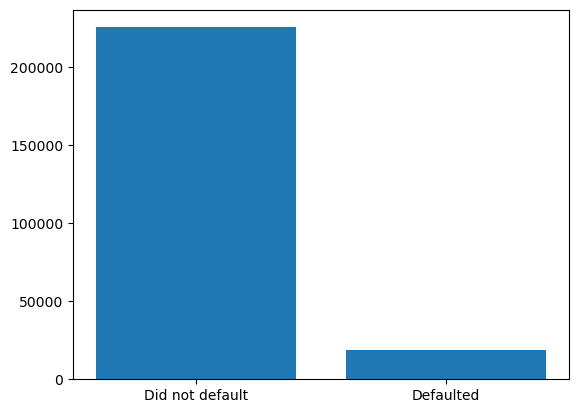

In [65]:
fig = plt.figure()
Default = ['Did not default', 'Defaulted']
payers = [len(df[df.TARGET ==0]),len(df[df.TARGET ==1])]
plt.bar(Default,payers)
plt.show()

## Balance the dataset if the data is imbalanced

### We will run a very simple model to see if SMOTE improves the sensitivity of model

In [66]:
X = df.drop(columns=['TARGET'], axis=0)
y = df.TARGET

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

C:\Users\jlod9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [69]:
from sklearn.metrics import accuracy_score, recall_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9159980350417554


col_0,0,1
TARGET,,
0,67059,478
1,5678,69


In [70]:
rec1 = recall_score(y_test,y_predict)
print(rec1)

0.012006264137811033


**This is a terrible recall value. This is because of our dataset is highly imbalanced**

In [71]:
sm = SMOTE(random_state=42)

In [72]:
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)

In [73]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 157711, 1: 13285})
After SMOTE : Counter({0: 157711, 1: 157711})


In [74]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

C:\Users\jlod9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6867392609573714


col_0,0,1
TARGET,,
0,48446,19091
1,3866,1881


In [75]:
rec2 = recall_score(y_test,y_predict)
print(rec2)

0.32730120062641377


**This is a massive improvement on our dataset just by purely balancing the dataset**

In [76]:
print("We sacrifice accuracy for much better of recall.\nFrom about "+ str(round(rec1 * 100,2))+ "% up to "+ str(round(rec2 * 100,2)) + "%, using a very basic model with zero optimisation just comparison")

We sacrifice accuracy for much better of recall.
From about 1.2% up to 32.73%, using a very basic model with zero optimisation just comparison


In [77]:
X, y = sm.fit_resample(X,y)

- [x] Balance the dataset if the data is imbalanced

## Plot the balanced data

In [78]:
print(str(round(len(y[y ==0])/len(y) *100, 2)) + '% of people did not default on their loans.')
print(str(round(len(y[y ==1])/len(y) *100, 2)) + '% of people did default on their loans.')

50.0% of people did not default on their loans.
50.0% of people did default on their loans.


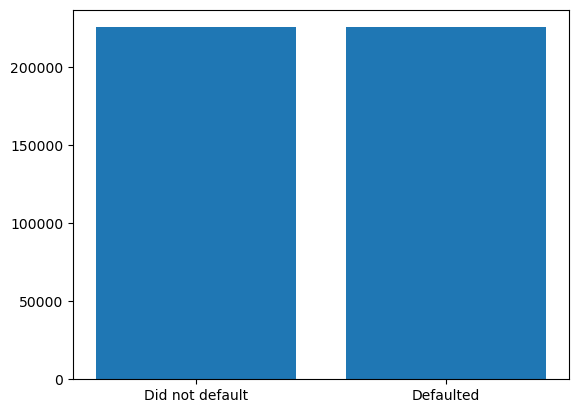

In [79]:
fig = plt.figure()
Default = ['Did not default', 'Defaulted']
payers = [len(y[y ==0]),len(y[y ==1])]
plt.bar(Default,payers)
plt.show()

- [x] Plot the balanced data or imbalanced data

- [x] <span style="color:green">Check for null values in the dataset
- [x] <span style="color:green">Print percentage of default to payer of the dataset for the TARGET column
- [x] <span style="color:green">Encode the columns that is required for the model
- [x] <span style="color:green">Balance the dataset if the data is imbalanced
- [x] <span style="color:green">Plot the balanced data or imbalanced data

### Normalizing the dataset

In [80]:
import tensorflow as tf

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3)

In [82]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [83]:
X_train.shape

(315347, 164)

## Build a Deep Learning model prediction model

- [ ] Calculate Sensitivity
- [ ] Calculate area under receiver operating characteristics curve

## First we select optimizer, loss function and metrics

- **Optimizer:** **Adam** is a pretty popular Gradient Descent Method for optimzing so we will use this
- **Loss Function:** As this is a binary classification deep learing model we choose **BinaryCrossentropy** as loss function. 
- **Metrics:** We are interested in sensitivity so we choose **Recall (other name for sensitivity)** as a metric. This makes sense as we want to maximize true positives as much as we can. We also choose **Area Under Curve** as this will make sure we don't sacrifice too much specificity for sensitivity.

In [84]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [85]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
    model.compile(optimizer='adagrad', 
                  loss = 'BinaryCrossentropy',
                  metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\jlod9\AppData\Local\Temp\ipykernel_18776\1536958817.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


<span style="color:green">**While I was able to get results from using GridSearch I was actually able to get better performance just by trying manually. I commented the code out instead of deleting it because a computer with better GPU would definitely find it more useful than manual tuning**

In [86]:
# layers = [[10], [64, 64, 64], [128, 128, 128, 128]]
# activations = ['sigmoid', 'relu']
# param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5)

# grid_result = grid.fit(X_train, y_train)

# [grid_result.best_score_,grid_result.best_params_]

In [87]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())           
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'BinaryCrossentropy',metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]) 

model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), batch_size=128)

Epoch 1/30
2464/2464 [==============================] - 13s 4ms/step - loss: 0.6785 - recall: 0.5569 - auc: 0.5970 - val_loss: 0.6788 - val_recall: 0.7108 - val_auc: 0.6107
Epoch 2/30
2464/2464 [==============================] - 9s 4ms/step - loss: 0.6728 - recall: 0.5883 - auc: 0.6132 - val_loss: 0.6669 - val_recall: 0.6092 - val_auc: 0.6287
Epoch 3/30
2464/2464 [==============================] - 9s 4ms/step - loss: 0.6673 - recall: 0.6210 - auc: 0.6268 - val_loss: 0.6624 - val_recall: 0.5085 - val_auc: 0.6434
Epoch 4/30
2464/2464 [==============================] - 9s 4ms/step - loss: 0.6616 - recall: 0.6151 - auc: 0.6393 - val_loss: 0.6564 - val_recall: 0.5691 - val_auc: 0.6537
Epoch 5/30
2464/2464 [==============================] - 9s 4ms/step - loss: 0.6577 - recall: 0.5985 - auc: 0.6481 - val_loss: 0.6518 - val_recall: 0.6293 - val_auc: 0.6607
Epoch 6/30
2464/2464 [==============================] - 9s 4ms/step - loss: 0.6543 - recall: 0.6217 - auc: 0.6555 - val_loss: 0.6499 - val_

In [88]:
score = model.evaluate(X_test, y_test,batch_size=128)
val_loss, val_sensitivity, AUC = model.evaluate(X_test, y_test)

4224/4224 [==============================] - 7s 2ms/step - loss: 0.6164 - recall: 0.6772 - auc: 0.7176


In [89]:
print("test loss:",str(val_loss),"\ntest sensitivity:", str(val_sensitivity))

test loss: 0.6163849830627441 
test sensitivity: 0.6771889925003052


In [90]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [96]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

print(
        confusion_matrix(y_test,classes_x), 
        '\n', 
        classification_report(y_test,classes_x)
)

4224/4224 [==============================] - 5s 1ms/step
[[67515     0]
 [67634     0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     67515
           1       0.00      0.00      0.00     67634

    accuracy                           0.50    135149
   macro avg       0.25      0.50      0.33    135149
weighted avg       0.25      0.50      0.33    135149



C:\Users\jlod9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jlod9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jlod9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Calculate Sensitivity as a metrice

It makes sense that we would be interested in Sensitivity as we want to catch as many load defaulters as possible, i.e. catch as many true positives as possible

In [97]:
print("The model calculates a sensitivity of", val_sensitivity)

The model calculates a sensitivity of 0.6771889925003052


- [x] Calculate Sensitivity

##  Calculate area under receiver operating characteristics curve

We will first visulize the curve, including the baseline. This baseline shows us what the curve would be if we made a 50/50 guess whether a payer would default 

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

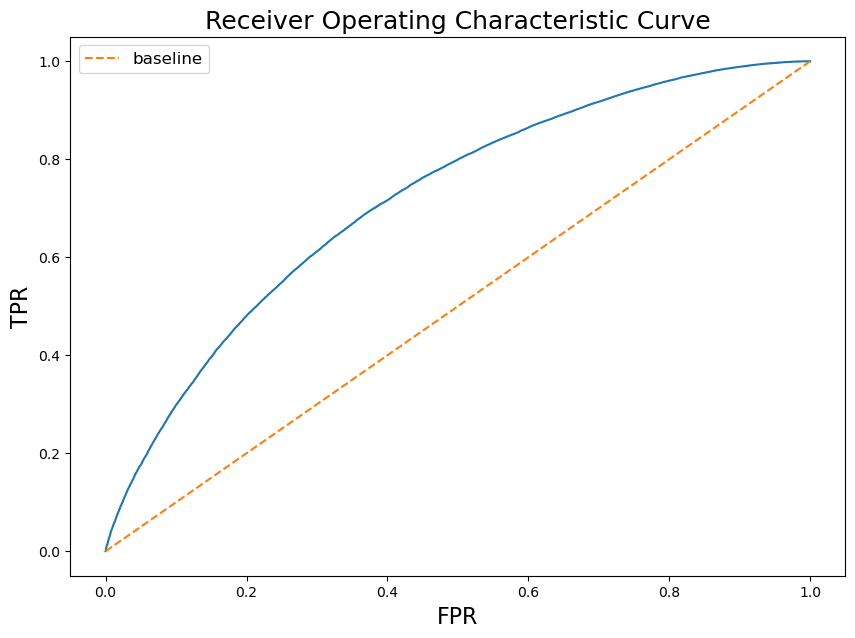

In [99]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate (TPR)
- False Positive Rate (FPR)

AUC (Area Under Curve) provides an aggregate measure of performance across all possible classification thresholds.

In [100]:
print("The model calculates an Area Under the Receiver Operating Characterisitcs curve of", AUC)

The model calculates an Area Under the Receiver Operating Characterisitcs curve of 0.7175995111465454


- [x] Calculate area under receiver operating characteristics curve

- [x] <span style="color:green">Calculate Sensitivity
- [x] <span style="color:green">Calculate area under receiver operating characteristics curve